## Get Dataset

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


### Data Directory Analysis

In [3]:
# Get File Names and Categories and Data Amount
# File exploration
import os
import re
import numpy as np
from collections import defaultdict
import torch
def analyze_directory(path):
    file_pattern = re.compile(r"^(.*?)(\d{5})\..+$")  # captures category and 5-digit number
    category_files = defaultdict(list)

    for filename in os.listdir(path):
        match = file_pattern.match(filename)
        if match:
            category, number_str = match.groups()
            category_files[category].append((filename, int(number_str)))

    # Print summary of categories
    for category, files in category_files.items():
        numbers = [num for _, num in files]
        print(f"Category: {category}")
        print(f"  Number of files: {len(files)}")
        print(f"  Number range: {min(numbers)} to {max(numbers)}")

    print("\nInspecting one file per category:")
    for category, files in category_files.items():
        sample_file = next(f for f in files if f[0].endswith('.npz'))[0]
        filepath = os.path.join(path, sample_file)
        print(f"\nSample file for category '{category}': {sample_file}")
        try:
            data = np.load(filepath)
            for key in data:
                print(f"  Key: {key}, Shape: {data[key].shape}")
        except Exception as e:
            print(f"  Could not load file '{sample_file}': {e}")

# Example usage:
analyze_directory("/Users/omargharib/Downloads/dexnet_2.1/dexnet_2.1_eps_50/tensors")


Category: camera_poses_
  Number of files: 35
  Number range: 0 to 34
Category: hand_poses_
  Number of files: 35
  Number range: 0 to 34
Category: grasped_obj_keys_
  Number of files: 35
  Number range: 0 to 34
Category: depth_ims_tf_table_
  Number of files: 35
  Number range: 0 to 34
Category: camera_intrs_
  Number of files: 35
  Number range: 0 to 34
Category: labels_
  Number of files: 35
  Number range: 0 to 34
Category: grasp_metrics_
  Number of files: 35
  Number range: 0 to 34
Category: traj_ids_
  Number of files: 35
  Number range: 0 to 34
Category: grasp_collision_metrics_
  Number of files: 35
  Number range: 0 to 34
Category: pile_ids_
  Number of files: 35
  Number range: 0 to 34

Inspecting one file per category:

Sample file for category 'camera_poses_': camera_poses_00014.npz
  Key: arr_0, Shape: (1000, 7)

Sample file for category 'hand_poses_': hand_poses_00012.npz
  Key: arr_0, Shape: (1000, 6)

Sample file for category 'grasped_obj_keys_': grasped_obj_keys_00030

Selected file number: 00007, sample index: 628

camera_poses_00007 -> Example[628]: [-0.04356764  0.9697376  -0.2399945   0.01065528 -0.02758897 -0.05267546
  0.6608834 ]

hand_poses_00007 -> Example[628]: [2.8500000e+02 3.4100000e+02 6.2858212e-01 2.8780890e+00 2.2628678e-02
 4.2000000e+01]



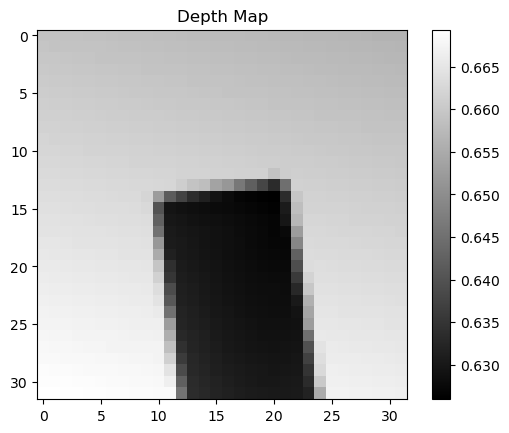

labels_00007 -> Example[628]: 0

traj_ids_00007 -> Example[628]: 2224



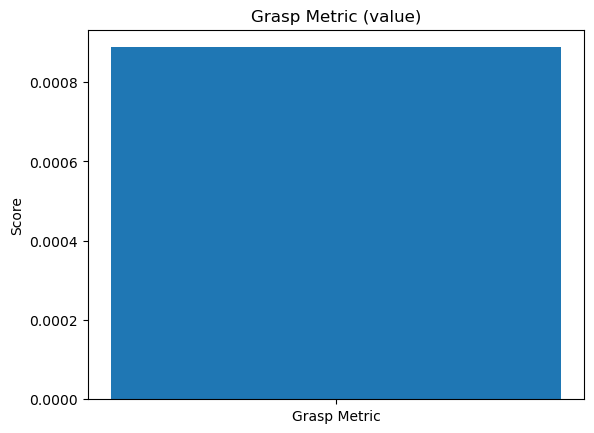

camera_intrs_00007 -> Example[628]: [524.74243 524.74243 299.      299.     ]

grasped_obj_keys_00007 -> Example[628]: b'YellowSaltCube_800_tex'

grasp_collision_metrics_00007 -> Example[628]: 0.0008877353393472731

pile_ids_00007 -> Example[628]: 1933



In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# Define all categories and their shape descriptions
categories = {
    'camera_poses_': (1000, 7),
    'hand_poses_': (1000, 6),
    'depth_ims_tf_table_': (466, 32, 32, 1),
    'labels_': (1000,),
    'traj_ids_': (1000,),
    'grasp_metrics_': (1000,),
    'camera_intrs_': (1000, 4),
    'grasped_obj_keys_': (1000,),
    'grasp_collision_metrics_': (1000,),
    'pile_ids_': (1000,)
}

def load_file(path, category, file_num):
    fname = f"{category}{file_num:05d}.npz"
    fpath = os.path.join(path, fname)
    return np.load(fpath)['arr_0']

def find_common_file_numbers(path):
    files = os.listdir(path)
    category_to_nums = {cat: set() for cat in categories}
    for fname in files:
        for cat in categories:
            if fname.startswith(cat) and fname.endswith('.npz'):
                try:
                    num = int(fname[len(cat):-4])
                    category_to_nums[cat].add(num)
                except:
                    continue
    # Find intersection of all sets
    common_nums = set.intersection(*category_to_nums.values())
    return sorted(list(common_nums))

def visualize_random_example(path):
    common_files = find_common_file_numbers(path)
    if not common_files:
        print("No common file numbers found across all categories.")
        return

    chosen_file_num = random.choice(common_files)

    # Load a sample file to determine valid index range
    depth_map = load_file(path, 'depth_ims_tf_table_', chosen_file_num)
    max_index = depth_map.shape[0]  # Likely 466
    chosen_index = random.randint(0, max_index - 1)

    print(f"Selected file number: {chosen_file_num:05d}, sample index: {chosen_index}\n")

    # Store and print/plot each category
    for category in categories:
        data = load_file(path, category, chosen_file_num)

        if category == 'depth_ims_tf_table_':
            image = data[chosen_index].squeeze()
            plt.figure()
            plt.title("Depth Map")
            plt.imshow(image, cmap='gray')
            plt.colorbar()
            plt.show()

        elif category == 'grasp_metrics_':
            plt.figure()
            plt.title("Grasp Metric (value)")
            plt.bar([0], [data[chosen_index]])
            plt.xticks([0], ['Grasp Metric'])
            plt.ylabel('Score')
            plt.show()

        else:
            print(f"{category}{chosen_file_num:05d} -> Example[{chosen_index}]: {data[chosen_index]}\n")

# Example usage
# Replace this path with the actual path to your data folder
visualize_random_example("/Users/omargharib/Downloads/dexnet_2.1/dexnet_2.1_eps_50/tensors")


In [ ]:
# cd scripts/
# ./download_dexnet_2.sh


In [ ]:
# dataset['image']['depth_ims']     # Shape: (N, 32, 32)   — depth image
# dataset['pose']                   # Shape: (N, 4)        — grasp pose (x, y, z, angle)
# dataset['success']                # Shape: (N,)          — binary label: success/failure


In [ ]:
"""
For tensorfloaw dataset
"""
# import torch
# from torch.utils.data import Dataset
# import h5py
# import numpy as np

# class DexNetDataset(Dataset):
#     def __init__(self, h5_path):
#         self.data = h5py.File(h5_path, 'r')
#         self.depth_images = self.data['image']['depth_ims'][:]
#         self.labels = self.data['grasp_qualities'][:]  # or 'success', depending on file

#     def __len__(self):
#         return len(self.depth_images)

#     def __getitem__(self, idx):
#         img = self.depth_images[idx]
#         img = np.expand_dims(img, axis=0)  # Convert to (1, H, W) for PyTorch CNN
#         label = self.labels[idx]
#         return torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


# from torch.utils.data import DataLoader

# dataset = DexNetDataset('path/to/dexnet_dataset.h5')
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [7]:
from customize_dataset import DexNetNPZDataset
from torch.utils.data import DataLoader

dataset = DexNetNPZDataset('/Users/omargharib/Downloads/dexnet_2.1/dexnet_2.1_eps_50/tensors')
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

In [9]:
# Load dataset with regression labels and full 6D poses
from customize_dataset import DexNetNPZDatasetAll
from torch.utils.data import DataLoader, random_split
dataset = DexNetNPZDatasetAll(tensor_dir='/Users/omargharib/Downloads/dexnet_2.1/dexnet_2.1_eps_50/tensors', use_regression=True, pose_dims=[0, 1, 2, 3, 4, 5])
img, pose, label = dataset[0]
print(img.shape)    # torch.Size([3, 32, 32])
print(pose.shape)   # torch.Size([6])
print(label)        # A float (grasp quality)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)


torch.Size([1, 32, 32])
torch.Size([6])
tensor(0.0065)


In [11]:
for i in dataloader:
    print(i[0].shape, i[1])
    break


torch.Size([16, 1, 32, 32]) tensor([[ 3.0000e+02,  3.8000e+02,  7.1893e-01,  6.0782e+00,  2.2682e-02,
          3.7000e+01],
        [ 3.9200e+02,  1.9900e+02,  7.2946e-01,  5.4255e+00,  1.7668e-02,
          3.6000e+01],
        [ 3.1800e+02,  2.8300e+02,  7.0609e-01,  1.8357e+00,  9.6458e-03,
          3.7000e+01],
        [ 3.1700e+02,  2.7500e+02,  6.5424e-01,  4.9491e+00, -4.4021e-02,
          4.0000e+01],
        [ 3.1800e+02,  3.0700e+02,  7.3879e-01,  1.9460e+00, -3.4253e-02,
          3.6000e+01],
        [ 2.4600e+02,  3.0500e+02,  6.5658e-01,  4.4994e+00,  4.5764e-02,
          4.0000e+01],
        [ 3.6300e+02,  2.2400e+02,  6.9709e-01,  3.1643e+00, -4.1339e-02,
          3.8000e+01],
        [ 3.0800e+02,  2.8000e+02,  6.7189e-01,  1.5955e-01,  8.9274e-03,
          3.9000e+01],
        [ 2.0400e+02,  2.9700e+02,  6.7385e-01,  4.7153e+00,  1.9597e-04,
          3.9000e+01],
        [ 3.7200e+02,  3.7900e+02,  7.3208e-01,  6.0303e+00,  3.1101e-02,
          3.6000e+01],
  

In [13]:
i[0].shape

torch.Size([16, 1, 32, 32])

## Image Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 6 * 6, 64)
        self.fc2 = nn.Linear(64, 1)  # Binary classification (grasp success)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (B, 16, 15, 15)
        x = self.pool(F.relu(self.conv2(x)))  # (B, 32, 6, 6)
        x = x.view(-1, 32 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights

class ResNetGraspNet(nn.Module):
    """
    A binary classification model for grasp success using ResNet-50 as a backbone.
    """
    def __init__(self, pretrained: bool = True, num_classes: int = 1, dropout_rate: float = 0.2):
        super(ResNetGraspNet, self).__init__()
        # Load ResNet-50 backbone with optional ImageNet pretrained weights
        weights = ResNet50_Weights.IMAGENET1K_V2 if pretrained else None
        self.backbone = resnet50(weights=weights)
        # Retrieve number of input features to the classifier head
        in_features = self.backbone.fc.in_features
        # Replace the original classification head
        self.backbone.fc = nn.Sequential(
            nn.Dropout(dropout_rate, inplace=True),
            nn.Linear(in_features, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Forward pass through ResNet-50 and sigmoid head
        return self.backbone(x)

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights

class EfficientNetV2GraspNet(nn.Module):
    """
    A binary classification model for grasp success using EfficientNet-V2-S as a backbone.
    """
    def __init__(self, pretrained: bool = True, num_classes: int = 1, dropout_rate: float = 0.2):
        super(EfficientNetV2GraspNet, self).__init__()
        # Load EfficientNet-V2-S backbone with optional ImageNet pretrained weights
        weights = EfficientNet_V2_S_Weights.IMAGENET1K_V1 if pretrained else None
        self.backbone = efficientnet_v2_s(weights=weights)
        # Retrieve number of input features to the classifier head
        in_features = self.backbone.classifier[1].in_features
        # Replace the classifier head for binary grasp success prediction
        self.backbone.classifier = nn.Sequential(
            nn.Dropout(dropout_rate, inplace=True),
            nn.Linear(in_features, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Forward pass through EfficientNet-V2 and sigmoid head
        return self.backbone(x)

### Forward Pass and Evaluation Measurements Define

In [ ]:
dataloader

### Model Training

In [ ]:
for i in model.parameters():
    print(i.shape)

In [ ]:
# model = SimpleCNN()
model = EfficientNetV2GraspNet()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

from tqdm import tqdm
for epoch in range(3):
    for imgs, labels in tqdm(dataloader):
        outputs = model(imgs)
        loss = criterion(outputs.squeeze(), labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        break


In [ ]:
import torch
from tqdm import tqdm

num_epochs = 3
loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for imgs, labels in progress_bar:
        outputs = model(imgs).squeeze()
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        running_loss += loss.item() * imgs.size(0)

        # Optional: compute accuracy
        predicted = (outputs >= 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        break

    epoch_loss = running_loss / total
    accuracy = correct / total

    loss_history.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] — Loss: {epoch_loss:.4f} — Accuracy: {accuracy:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.show()


## Image + Poses Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleGQCNN(nn.Module):
    def __init__(self, pose_dim=4, output_type='binary', merge_methods="element_dot"):
        """
        pose_dim: number of dimensions in the pose vector (e.g., x, y, z, theta)
        output_type: 'binary' or 'regression'
        """
        super(SimpleGQCNN, self).__init__()
        self.output_type = output_type

        # Image stream
        self.conv1 = nn.Conv2d(1, 16, 3)           # → (B, 16, 30, 30)
        self.pool = nn.MaxPool2d(2, 2)             # → (B, 16, 15, 15)
        self.conv2 = nn.Conv2d(16, 32, 3)          # → (B, 32, 13, 13) → pool → (B, 32, 6, 6)
        self.im_fc = nn.Linear(32 * 6 * 6, 64)     # → (B, 64)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.im_fc_bn = nn.BatchNorm1d(64)

        # Pose stream
        self.pose_fc1 = nn.Linear(pose_dim, 64)
        self.pose_fc2 = nn.Linear(64, 64)
        self.dropout = nn.Dropout(p=0.5)
        self.merge_methods = merge_methods
        if self.merge_methods == "element_dot":
            # Merge stream after elementwise multiplication
            self.merge_fc1 = nn.Linear(64, 32)
            self.merge_fc2 = nn.Linear(32, 1)
        else:
            # Merge stream by concatanation
            self.merge_fc1 = nn.Linear(64 + 64, 64)
            self.merge_fc2 = nn.Linear(64, 1)  # Single output for binary or regression

    def forward(self, image, pose):
        
        # Image stream
        x = self.pool(F.relu(self.bn1(self.conv1(image))))   # (B, 16, 15, 15)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))       # (B, 32, 6, 6)
        # x = x.view(x.size(0), -1)                  # Flatten
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.im_fc(x))                  # (B, 64)

        # Pose stream
        p = self.dropout(F.relu(self.pose_fc1(pose)))            # (B, 64)
        p = self.dropout(F.relu(self.pose_fc2(p)))               # (B, 64)

        if self.merge_methods == "element_dot":
            # Element-wise multiplication
            combined = x * p                           # (B, 64)
        else:
            # Merge
            combined = torch.cat((x, p), dim=1)       # -> (B, 96)

        # Final layers
        out = F.relu(self.merge_fc1(combined))     # (B, 32)
        out = self.merge_fc2(out)                  # (B, 1)

        if self.output_type == 'binary':
            out = torch.sigmoid(out)               # Binary prediction
        return out


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50, ResNet50_Weights

class SimpleGQCNN(nn.Module):
    """
    OMAR MODEL
    A grasp-quality classifier combining ResNet-50 image features with pose embeddings (supports single-channel input).
    """
    def __init__(self, pose_dim=4, hidden_dim=64, output_type='binary', pretrained=True, dropout_rate=0.2):
        super(SimpleGQCNN, self).__init__()
        self.output_type = output_type

        # 1) Visual backbone: ResNet-50, modify for 1-channel input
        weights = ResNet50_Weights.IMAGENET1K_V2 if pretrained else None
        backbone = resnet50(weights=weights)

        # Replace first conv to accept 1 input channel instead of 3
        orig_conv = backbone.conv1
        new_conv = nn.Conv2d(
            in_channels=1,
            out_channels=orig_conv.out_channels,
            kernel_size=orig_conv.kernel_size,
            stride=orig_conv.stride,
            padding=orig_conv.padding,
            bias=(orig_conv.bias is not None)
        )
        if pretrained:
            # initialize by summing pretrained weights over original RGB channels
            with torch.no_grad():
                new_conv.weight[:] = orig_conv.weight.sum(dim=1, keepdim=True)
                if orig_conv.bias is not None:
                    new_conv.bias[:] = orig_conv.bias
        backbone.conv1 = new_conv

        # Remove original classifier head
        self.feature_extractor = nn.Sequential(*list(backbone.children())[:-1])  # outputs [B, 2048, 1, 1]
        feat_size = backbone.fc.in_features  # 2048
        # Project extracted features to hidden_dim
        self.im_fc = nn.Linear(feat_size, hidden_dim)

        # 2) Pose stream
        self.pose_fc1 = nn.Linear(pose_dim, hidden_dim)
        self.pose_fc2 = nn.Linear(hidden_dim, hidden_dim)

        # 3) Merge & classifier
        self.merge_fc1 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.merge_fc2 = nn.Linear(hidden_dim // 2, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, image, pose):
        # Image stream: extract and flatten features
        x = self.feature_extractor(image)    # [B, 2048, 1, 1]
        x = torch.flatten(x, 1)              # [B, 2048]
        x = F.relu(self.im_fc(x))            # [B, hidden_dim]

        # Pose stream
        p = F.relu(self.pose_fc1(pose))      # [B, hidden_dim]
        p = F.relu(self.pose_fc2(p))         # [B, hidden_dim]

        # Fusion via element-wise multiplication
        combined = x * p                     # [B, hidden_dim]
        combined = self.dropout(combined)

        # Final MLP
        out = F.relu(self.merge_fc1(combined))  # [B, hidden_dim//2]
        out = self.merge_fc2(out)               # [B, 1]

        if self.output_type == 'binary':
            out = torch.sigmoid(out)            # probability for binary
        return out


In [17]:
model = SimpleGQCNN(pose_dim=4, output_type='regression')  # or 'binary'

image = torch.randn(8, 1, 32, 32)  # Batch of 8 grayscale images
pose = torch.randn(8, 4)          # Corresponding batch of 4D poses

output = model(image, pose)
print(output.shape)  # torch.Size([8, 1])


torch.Size([8, 1])


In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())

In [19]:
import torch.optim as optim
from tqdm import tqdm
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.amp import GradScaler, autocast

# Set config
tensor_dir = '/Users/omargharib/Downloads/dexnet_2.1/dexnet_2.1_eps_50/tensors'  # replace with actual path
batch_size = 32
use_regression = False  # or True
pose_dims = [2]          # or full [0, 1, 2, 3, 4, 5]
# torch.backends.cudnn.benchmark = True
# Create dataset and dataloader


dataset = DexNetNPZDatasetAll(tensor_dir=tensor_dir, use_regression=use_regression, pose_dims=pose_dims)
val_split = 0.2  # 20% for validation
val_size = int(len(dataset) * val_split)
train_size = len(dataset) - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# ✅ Create DataLoaders
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True,
    num_workers=8, pin_memory=True
)

val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False,
    num_workers=8, pin_memory=True
)
model = SimpleGQCNN(pose_dim=len(pose_dims), output_type='regression' if use_regression else 'binary')
os.environ["CUDA_VISIBLE_DEVICES"]="1"
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

if use_regression:
    criterion = nn.MSELoss()
else:
    criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)


In [21]:
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, device,
          num_epochs=10, save_path="model.pth"):

    model = model.to(device, memory_format=torch.channels_last)
    scaler = GradScaler()

    train_losses = []
    val_losses = []
    best_val_loss = float("inf")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # 🔁 Training Loop
        for images, poses, labels in tqdm(train_loader, desc=f"[Epoch {epoch+1}/{num_epochs}] Training"):
            images = images.to(device, non_blocking=True).contiguous(memory_format=torch.channels_last)
            poses = poses.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True).unsqueeze(1)

            optimizer.zero_grad()
            with autocast("cuda"):
                outputs = model(images, poses)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # 🔍 Evaluation Loop
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, poses, labels in tqdm(val_loader, desc=f"[Epoch {epoch+1}] Validation"):
                images = images.to(device, non_blocking=True).contiguous(memory_format=torch.channels_last)
                poses = poses.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True).unsqueeze(1)

                with autocast("cuda"):
                    outputs = model(images, poses)
                    loss = criterion(outputs, labels)

                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, LR = {current_lr:.2e}")

        # ✅ Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), save_path)
            print(f"✔️ Saved best model to '{save_path}'")

    # 📊 Plot training & validation loss
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(val_losses, label='Validation Loss', marker='x')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig("loss_curve.png")
    plt.show()

    return train_losses, val_losses


/opt/anaconda3/lib/python3.11/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
[Epoch 1/10] Training:   0%|                            | 0/871 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.11/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[Epoch 1] Validation: 100%|███████████████████| 218/218 [05:40<00:00,  1.56s/it]


Epoch 1: Train Loss = 0.4946, Val Loss = 0.3874, LR = 1.00e-04
✔️ Saved best model to 'model.pth'


[Epoch 2] Validation: 100%|███████████████████| 218/218 [05:24<00:00,  1.49s/it]


Epoch 2: Train Loss = 0.3683, Val Loss = 0.3612, LR = 1.00e-04
✔️ Saved best model to 'model.pth'


[Epoch 3] Validation: 100%|███████████████████| 218/218 [05:29<00:00,  1.51s/it]


Epoch 3: Train Loss = 0.3450, Val Loss = 0.3403, LR = 1.00e-04
✔️ Saved best model to 'model.pth'


[Epoch 4] Validation: 100%|███████████████████| 218/218 [05:22<00:00,  1.48s/it]


Epoch 4: Train Loss = 0.3253, Val Loss = 0.3276, LR = 1.00e-04
✔️ Saved best model to 'model.pth'


[Epoch 5] Validation: 100%|███████████████████| 218/218 [05:24<00:00,  1.49s/it]


Epoch 5: Train Loss = 0.3147, Val Loss = 0.3459, LR = 1.00e-04


[Epoch 6] Validation: 100%|███████████████████| 218/218 [05:35<00:00,  1.54s/it]


Epoch 6: Train Loss = 0.3025, Val Loss = 0.3391, LR = 1.00e-04


[Epoch 7] Validation: 100%|███████████████████| 218/218 [05:32<00:00,  1.53s/it]


Epoch 7: Train Loss = 0.2842, Val Loss = 0.3309, LR = 1.00e-05


[Epoch 8] Validation: 100%|███████████████████| 218/218 [05:39<00:00,  1.56s/it]


Epoch 8: Train Loss = 0.2414, Val Loss = 0.3277, LR = 1.00e-05


[Epoch 9] Validation: 100%|███████████████████| 218/218 [05:30<00:00,  1.52s/it]


Epoch 9: Train Loss = 0.2210, Val Loss = 0.3345, LR = 1.00e-05


[Epoch 10] Validation: 100%|██████████████████| 218/218 [05:31<00:00,  1.52s/it]


Epoch 10: Train Loss = 0.2069, Val Loss = 0.3455, LR = 1.00e-06


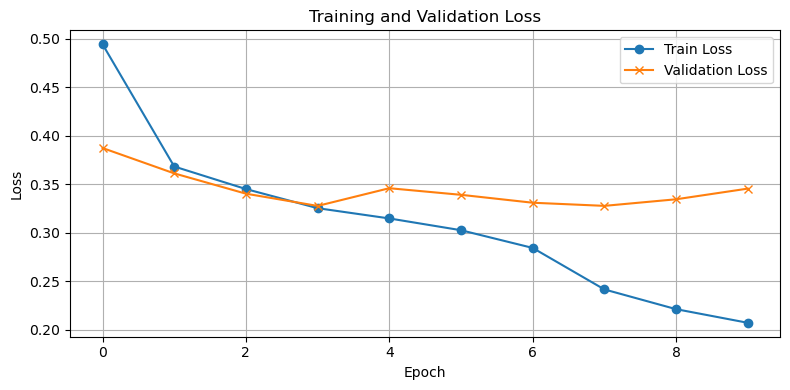

([0.49455426766801236,
  0.36831278743138957,
  0.34503942000948057,
  0.32528824266794765,
  0.3146912164720958,
  0.30253099526966204,
  0.28424383254227764,
  0.24138462640148353,
  0.22100653312031082,
  0.20692703060711704],
 [0.38741574060479433,
  0.36121600114424296,
  0.340253655721835,
  0.32761892068003295,
  0.345904418839774,
  0.3390848973612173,
  0.33091348149907696,
  0.3276761156429938,
  0.3344710666447058,
  0.3454844217166441])

In [23]:
train(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=10)

In [25]:
def evaluate_accuracy(model, dataloader, device, threshold=0.5):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, poses, labels in dataloader:
            images = images.to(device, non_blocking=True).contiguous(memory_format=torch.channels_last)
            poses = poses.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True).unsqueeze(1)

            outputs = model(images, poses)
            predictions = (outputs >= threshold).float()  # binary threshold
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f"✅ Accuracy: {accuracy * 100:.2f}%")
    return accuracy


In [27]:
accuracy = evaluate_accuracy(model, val_loader, device)


✅ Accuracy: 85.85%
